In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets,transforms

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='/content/drive/MyDrive/Deep_learning-datasets',train=True,download=False,transform=transform)
test_data = datasets.MNIST(root='/content/drive/MyDrive/Deep_learning-datasets',train=False,download=False,transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Deep_learning-datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Deep_learning-datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [ ]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
image,label = train_data[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
label

5

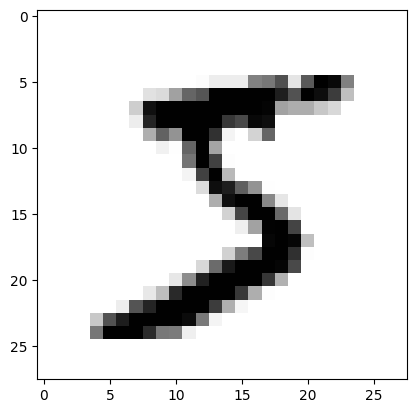

In [ ]:
plt.imshow(image.reshape(28,28),cmap='gist_yarg')

In [ ]:
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)
test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [ ]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}'))

In [ ]:
for images,labels in train_loader:
  break

In [ ]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
images.shape

torch.Size([100, 1, 28, 28])

In [ ]:
labels.shape

torch.Size([100])

Labels:  [    7     2     3     5     8     5     3     6     9     9     1     3]


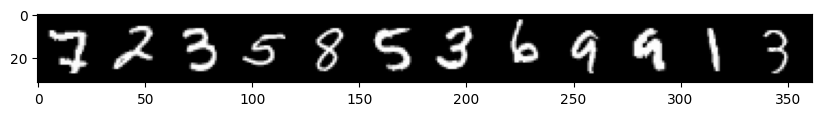

In [ ]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
class MultilayerPerceptron(nn.Module):
  def __init__(self,in_size=784,out_size=10,layers=[120,84]):
    super().__init__()
    self.fc1 = nn.Linear(in_size,layers[0])
    self.fc2 = nn.Linear(layers[0],layers[1])
    self.fc3 = nn.Linear(layers[1],out_size)

  def forward(self,X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)  # MULTI CLASS CLASSIFICATION

In [ ]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
images.shape

torch.Size([100, 1, 28, 28])

In [ ]:
images.view(100,-1).shape

torch.Size([100, 784])

In [ ]:
import time
start_time = time.time()
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train.view(100,-1))
    loss = criterion(y_pred,y_train)
    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted==y_train).sum()
    trn_corr+=batch_corr
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if b%200==0:
      acc = trn_corr.item()*100/(100*b)
      print(f'Epoch {i} Batch {b} Loss {loss.item()} Accuracy {acc}')
  train_losses.append(loss)
  train_correct.append(trn_corr)
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test.view(500,-1))
      predicted = torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)
total_time = time.time() - start_time
print(f'Duration: {total_time/60} minutes')

Epoch 0 Batch 200 Loss 0.24385470151901245 Accuracy 94.825
Epoch 0 Batch 400 Loss 0.14487527310848236 Accuracy 95.06
Epoch 0 Batch 600 Loss 0.07246916741132736 Accuracy 95.36
Epoch 1 Batch 200 Loss 0.08382391184568405 Accuracy 96.52
Epoch 1 Batch 400 Loss 0.06502086669206619 Accuracy 96.625
Epoch 1 Batch 600 Loss 0.06827977299690247 Accuracy 96.71666666666667
Epoch 2 Batch 200 Loss 0.12022455036640167 Accuracy 97.635
Epoch 2 Batch 400 Loss 0.058163758367300034 Accuracy 97.5
Epoch 2 Batch 600 Loss 0.03137049823999405 Accuracy 97.5
Epoch 3 Batch 200 Loss 0.11588415503501892 Accuracy 98.155
Epoch 3 Batch 400 Loss 0.0415460504591465 Accuracy 98.005
Epoch 3 Batch 600 Loss 0.048713117837905884 Accuracy 98.02166666666666
Epoch 4 Batch 200 Loss 0.009237682446837425 Accuracy 98.35
Epoch 4 Batch 400 Loss 0.03706294670701027 Accuracy 98.4825
Epoch 4 Batch 600 Loss 0.058399610221385956 Accuracy 98.39166666666667
Epoch 5 Batch 200 Loss 0.035170312970876694 Accuracy 98.825
Epoch 5 Batch 400 Loss 0.0

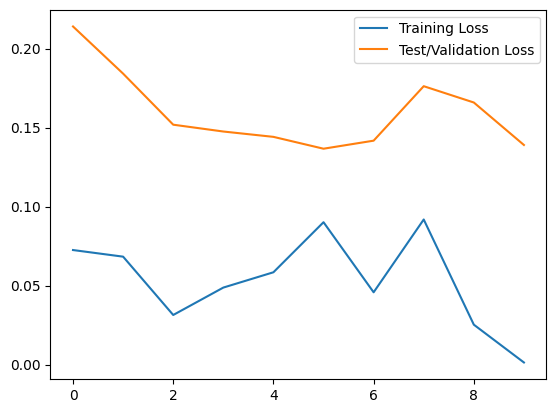

In [ ]:
plt.plot([tr_loss.detach().numpy() for tr_loss in train_losses],label='Training Loss')
plt.plot([ts_loss.detach().numpy() for ts_loss in test_losses],label='Test/Validation Loss')
plt.legend()

In [ ]:
train_acc = [t/600 for t in train_correct]
test_acc = [t/100 for t in test_correct]

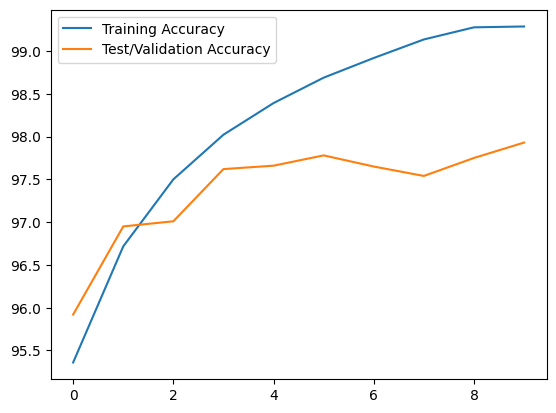

In [ ]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(test_acc,label='Test/Validation Accuracy')
plt.legend()

In [ ]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for X_test,y_test in test_load_all:
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct+=(predicted==y_test).sum()

In [ ]:
test_acc = 100*correct.item()/len(test_data)
print(f'Test Accuracy {test_acc}%')

Test Accuracy 97.93%


In [ ]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()
print(confusion_matrix(predicted.view(-1),y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 970    0    2    0    0    2    6    1    4    0]
 [   0 1128    0    0    0    0    3    3    0    3]
 [   1    3 1011    3    2    0    2    9    7    0]
 [   1    1    3  984    0   12    1    0    5    2]
 [   1    0    2    0  960    2    3    1    3    6]
 [   0    0    0    7    1  868    8    1    3    3]
 [   2    0    2    0    4    1  935    0    1    0]
 [   1    1    5    8    3    1    0 1007    5    5]
 [   3    2    6    2    1    4    0    0  942    2]
 [   1    0    1    6   11    2    0    6    4  988]]


In [ ]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')

# Display the number of misses
len(misses)

207

In [ ]:
misses[:10]

array([  61,  149,  151,  217,  247,  259,  274,  321,  340,  381])

In [ ]:
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Index: [  61  149  151  217  247  259  274  321  340  381  445  495]
Label: [   8    2    9    6    4    6    9    2    5    3    6    8]
Guess: [   2    4    8    5    2    0    3    7    3    7    0    2]


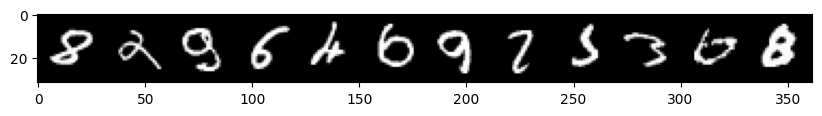

In [ ]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));